In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
sample=pd.read_csv("2018-05-17 - Recruit Sample Data Train.csv")
sample.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False
2,1251,2018-02-28T12:04:56Z,CA,3000.0,3000.0,R,0,6,Monthly,117.65,2018-02-28,2018-03-30,True
3,440,2018-03-28T15:47:59Z,CA,1500.0,1500.0,R,12,6,Monthly,117.65,2018-03-28,2018-04-28,False
4,1692,2018-02-13T04:36:00Z,CA,2392.0,598.0,R,130,36,Weekly,300.00,2018-02-13,2018-02-23,False


In [77]:
sample['First Payment Default'].value_counts(normalize=True)

False    0.734375
True     0.265625
Name: First Payment Default, dtype: float64

Class 0: 1175
Class 1: 425


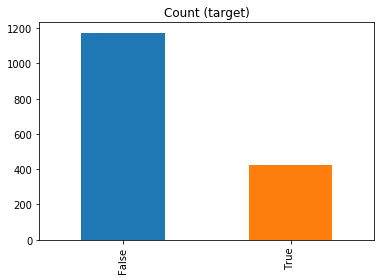

In [78]:
target_count = sample['First Payment Default'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
target_count.plot(kind='bar', title='Count (target)');


In [79]:
sample.dtypes

SetID                      int64
Time of Application       object
State                     object
Monthly Net Income       float64
Paycheck Net Income      float64
Rent or Own               object
Months at Residence        int64
Bank Account Months        int64
Pay Cycle                 object
Loan Amount              float64
Loan Funded Date          object
Loan Due Date             object
First Payment Default       bool
dtype: object

In [80]:
sample['Loan Funded Date']=pd.to_datetime(sample['Loan Funded Date'])
print(df['funded_dtae'].head())

0   2018-03-28
1   2018-03-23
2   2018-02-28
3   2018-03-28
4   2018-02-13
Name: funded_dtae, dtype: datetime64[ns]


In [81]:
sample['Loan Due Date']=pd.to_datetime(sample['Loan Due Date'])
print(sample['Loan Due Date'].head())

0   2018-04-11
1   2018-04-06
2   2018-03-30
3   2018-04-28
4   2018-02-23
Name: Loan Due Date, dtype: datetime64[ns]


In [82]:
sample['time_to_pay']=pd.DataFrame(sample['Loan Due Date']-sample['Loan Funded Date'])
sample.drop(columns=['Loan Due Date','Loan Funded Date'],inplace=True)

In [83]:
sample

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,First Payment Default,time_to_pay
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,False,14 days
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,False,14 days
2,1251,2018-02-28T12:04:56Z,CA,3000.0,3000.0,R,0,6,Monthly,117.65,True,30 days
3,440,2018-03-28T15:47:59Z,CA,1500.0,1500.0,R,12,6,Monthly,117.65,False,31 days
4,1692,2018-02-13T04:36:00Z,CA,2392.0,598.0,R,130,36,Weekly,300.00,False,10 days
5,804,2018-03-17T11:17:38Z,TX,5000.0,2500.0,R,12,12,BiWeekly,385.06,False,11 days
6,294,2018-04-02T16:39:53Z,CA,6000.0,3000.0,R,36,12,BiWeekly,235.30,True,9 days
7,697,2018-03-20T20:44:50Z,CA,2864.0,1432.0,R,37,36,BiMonthly,117.65,False,9 days
8,713,2018-03-20T13:55:20Z,CA,4000.0,2000.0,R,60,60,BiWeekly,117.65,True,15 days
9,508,2018-03-27T09:54:01Z,TX,2800.0,1400.0,R,24,15,BiWeekly,641.35,True,10 days


In [68]:
sample.describe()

,SetID,Monthly Net Income,Paycheck Net Income,Months at Residence,Bank Account Months,Loan Amount,time_to_pay
count,1600.0000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600
mean,1004.8700,4362.641250,2718.488750,63.285625,24.731250,317.974619,16 days 02:49:12
std,584.0755,5524.868265,4894.909919,70.777592,23.414134,176.993218,6 days 17:24:24.648618
min,2.0000,70.000000,70.000000,0.000000,3.000000,117.650000,6 days 00:00:00
25%,492.7500,2000.000000,1250.000000,17.000000,6.000000,235.300000,11 days 00:00:00
50%,1012.5000,3200.000000,2100.000000,39.000000,24.000000,300.000000,15 days 00:00:00
75%,1514.2500,5139.000000,3500.000000,81.000000,36.000000,320.592500,20 days 00:00:00
max,2000.0000,184000.000000,184000.000000,690.000000,410.000000,644.240000,31 days 00:00:00


In [5]:
sample.skew()

SetID                    -0.010355
Monthly Net Income       21.922906
Paycheck Net Income      31.897766
Months at Residence       3.002301
Bank Account Months       6.748409
Loan Amount               0.845860
First Payment Default     1.062320
dtype: float64

In [6]:
missing_values=pd.DataFrame({"columns_name":sample.columns,
                    "Na_count":sample.isnull().sum(),
                     "Na_percentage":sample.isnull().sum()/sample.shape[0]*100})
missing_values.sort_values(by="Na_percentage",ascending=False)

,columns_name,Na_count,Na_percentage
SetID,SetID,0,0.0
Time of Application,Time of Application,0,0.0
State,State,0,0.0
Monthly Net Income,Monthly Net Income,0,0.0
Paycheck Net Income,Paycheck Net Income,0,0.0
Rent or Own,Rent or Own,0,0.0
Months at Residence,Months at Residence,0,0.0
Bank Account Months,Bank Account Months,0,0.0
Pay Cycle,Pay Cycle,0,0.0
Loan Amount,Loan Amount,0,0.0


In [7]:
sample.corr()

,SetID,Monthly Net Income,Paycheck Net Income,Months at Residence,Bank Account Months,Loan Amount,First Payment Default
SetID,1.000000,0.104556,0.069846,0.112357,0.131299,0.035676,-0.042404
Monthly Net Income,0.104556,1.000000,0.936308,-0.030648,0.069021,0.179618,0.082547
Paycheck Net Income,0.069846,0.936308,1.000000,0.000516,0.045390,0.148856,0.068984
Months at Residence,0.112357,-0.030648,0.000516,1.000000,0.166267,0.046890,-0.028628
Bank Account Months,0.131299,0.069021,0.045390,0.166267,1.000000,0.125348,-0.037772
Loan Amount,0.035676,0.179618,0.148856,0.046890,0.125348,1.000000,0.126960
First Payment Default,-0.042404,0.082547,0.068984,-0.028628,-0.037772,0.126960,1.000000


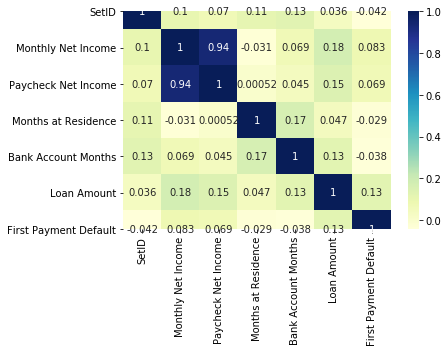

In [8]:
sns.heatmap(sample.corr(),annot=True, cmap="YlGnBu")

In [9]:
cat_cols=[]

for col in sample.columns:
    if sample[col].dtypes=="object":
        cat_cols.append(col)
        
print("categorical columns:",cat_cols)

categorical columns: ['Time of Application', 'State', 'Rent or Own', 'Pay Cycle', 'Loan Funded Date', 'Loan Due Date']


In [10]:
cont_cols=[col for col in sample.columns if sample[col].dtypes=="int64" or sample[col].dtypes=="float64"]

print("continous columns:",cont_cols)

continous columns: ['SetID', 'Monthly Net Income', 'Paycheck Net Income', 'Months at Residence', 'Bank Account Months', 'Loan Amount']


In [12]:
import scipy.stats

p_values_list=[]
for ele in cat_cols:
    crosstab=pd.crosstab(sample[ele],sample["First Payment Default"])
    results=scipy.stats.chi2_contingency(crosstab)
    p_values_list.append(results[1])

p_values_list

[0.5081374151157462,
 4.105294300661614e-06,
 0.3888918289211325,
 0.10754844009695554,
 0.2689521058596571,
 0.0014187524247946464]

In [16]:
p_values=pd.DataFrame({"columns_name":cat_cols,
                       "p_values":p_values_list})
print("p values:",p_values)
p_values[p_values['p_values']<=0.05]

p values:           columns_name  p_values
0  Time of Application  0.508137
1                State  0.000004
2          Rent or Own  0.388892
3            Pay Cycle  0.107548
4     Loan Funded Date  0.268952
5        Loan Due Date  0.001419


,columns_name,p_values
1,State,0.000004
5,Loan Due Date,0.001419


In [49]:
cols_to_drop=[]

for col in sample.columns:
    if sample[col].nunique()==sample.shape[0] or sample[col].nunique()==1:
        cols_to_drop.append(col)
        
cols_to_drop

['SetID']

In [61]:
anova_test=[]
for ele in cont_cols:
    results=scipy.stats.f_oneway(sample[ele],sample['First Payment Default'])
    anova_test.append(results[1])
anova_test

[0.0,
 8.450737129937671e-191,
 8.857541798925921e-102,
 2.725356548518103e-234,
 6.318213357308185e-305,
 0.0]

In [63]:
p_values_list=pd.DataFrame({"columns_name":cont_cols,
                "p_values":anova_test})
p_values_list

,columns_name,p_values
0,SetID,0.000000e+00
1,Monthly Net Income,8.450737e-191
2,Paycheck Net Income,8.857542e-102
3,Months at Residence,2.725357e-234
4,Bank Account Months,6.318213e-305
5,Loan Amount,0.000000e+00


In [64]:
p_values_list[p_values_list['p_values']<=0.5]

,columns_name,p_values
0,SetID,0.000000e+00
1,Monthly Net Income,8.450737e-191
2,Paycheck Net Income,8.857542e-102
3,Months at Residence,2.725357e-234
4,Bank Account Months,6.318213e-305
5,Loan Amount,0.000000e+00
